<a href="https://colab.research.google.com/github/apurvv28/ML-Labs/blob/assignment-2/assignment_2_apurv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **By Apurv Saktepar, Roll No. 11 From SEDA Division of CSE-AI Department. (PRN - 1252090011)**

> Date - 13/01/26
#### Assignment 2 - Perform the following operations using  Python on the data sets:

* Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles)
* Illustrate the feature distributions using histogram.
* Data cleaning, Data integration, Data transformation, Data model building (e.g. Classification)


### Step by Step Implementation

1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np

2. Create a dataset and dataframe

In [ ]:
data = {
    "Machine_ID": [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    "Machine_Type": ["CNC", "Lathe", "Drill", "CNC", "Welder", "Lathe", "Drill", "CNC", "Welder", "Lathe"],
    "Operating_Hours": [1200, 1350, 1100, np.nan, 1500, 900, 0, 1400, 1600, 1250],
    "Temperature_C": [75, 80, 78, 85, np.nan, 70, 65, 82, 88, 79],
    "Vibration_mm": [2.1, 2.5, np.nan, 3.0, 2.8, 1.9, 0, 2.6, 3.2, 2.4],
    "Energy_Consumption_kWh": [300, 350, 320, 400, 380, 290, 0, np.nan, 420, 360],
    "Maintenance_Required": ["No", "Yes", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "No"],
    "Failure": [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
}
df = pd.DataFrame(data)
df

,Machine_ID,Machine_Type,Operating_Hours,Temperature_C,Vibration_mm,Energy_Consumption_kWh,Maintenance_Required,Failure
0,201,CNC,1200.0,75.0,2.1,300.0,No,0
1,202,Lathe,1350.0,80.0,2.5,350.0,Yes,1
2,203,Drill,1100.0,78.0,NaN,320.0,No,0
3,204,CNC,NaN,85.0,3.0,400.0,Yes,1
4,205,Welder,1500.0,NaN,2.8,380.0,Yes,1
5,206,Lathe,900.0,70.0,1.9,290.0,No,0
6,207,Drill,0.0,65.0,0.0,0.0,No,0
7,208,CNC,1400.0,82.0,2.6,NaN,Yes,1
8,209,Welder,1600.0,88.0,3.2,420.0,Yes,1
9,210,Lathe,1250.0,79.0,2.4,360.0,No,0


3. Check dataset Information using shape and describe methods.

In [ ]:
df.shape

(10, 8)

In [ ]:
df.describe()

,Machine_ID,Operating_Hours,Temperature_C,Vibration_mm,Energy_Consumption_kWh,Failure
count,10.00000,9.000000,9.00000,9.000000,9.000000,10.000000
mean,205.50000,1144.444444,78.00000,2.277778,313.333333,0.500000
std,3.02765,477.915032,7.17635,0.947072,125.399362,0.527046
min,201.00000,0.000000,65.00000,0.000000,0.000000,0.000000
25%,203.25000,1100.000000,75.00000,2.100000,300.000000,0.000000
50%,205.50000,1250.000000,79.00000,2.500000,350.000000,0.500000
75%,207.75000,1400.000000,82.00000,2.800000,380.000000,1.000000
max,210.00000,1600.000000,88.00000,3.200000,420.000000,1.000000


### Computing minimum value, maximum value, mean, range, standard deviation, variance and percentiles (without using describe)

In [ ]:
df['Temperature_C'].max()

45.77777777777778

In [ ]:
df['Energy_Consumption_kWh'].min()

0.0

In [ ]:
df['Operating_Hours'].mean()

np.float64(1144.4444444444446)

In [ ]:
df['Temperature_C'].max()-df['Temperature_C'].min()

23.0

In [ ]:
df['Vibration_mm'].std()

0.8929075823495307

In [ ]:
df['Temperature_C'].var()

45.77777777777778

In [ ]:
df['Temperature_C'].quantile(0.25)

np.float64(75.75)

In [ ]:
df['Temperature_C'].quantile(0.50)

np.float64(78.5)

In [ ]:
df['Temperature_C'].quantile(0.75)

np.float64(81.5)

* Implementing user defined functions to calculate these values
1. Min and Max

In [ ]:
def get_min(data):
    current_min = data[0]
    for x in data:
        if x < current_min:
            current_min = x
    return current_min

def get_max(data):
    current_max = data[0]
    for x in data:
        if x > current_max:
            current_max = x
    return current_max

print(get_min(df['Temperature_C']))
print(get_max(df['Temperature_C']))

65.0
88.0


2. Mean

In [ ]:
def get_mean(data):
    total = 0.0
    count = 0
    for x in data:
        if x == x and x is not None:
            total += x
            count += 1

    if count == 0:
        return 0
    return total / count

print(get_mean(df['Temperature_C']))

78.0


3. Standard Deviation and Variance

In [ ]:
def get_variance(data):
    mu = get_mean(data)
    total_diff = 0
    count = 0
    for x in data:
        if x == x and x is not None:
            total_diff += (x - mu) ** 2
            count += 1
    return total_diff / count if count > 0 else 0

def get_std_dev(data):
    return get_variance(data) ** 0.5

print(get_variance(df['Temperature_C']))
print(get_std_dev(df['Temperature_C']))

45.77777777777778
6.765927710061479


* Describing Objective Qualities of Dataset

In [ ]:
df.describe(include='object')

,Machine_Type,Maintenance_Required
count,10,10
unique,4,2
top,CNC,No
freq,3,5


4. Detect Missing Values in the dataset

In [ ]:
df.isnull().sum()

,0
Machine_ID,0
Machine_Type,0
Operating_Hours,1
Temperature_C,1
Vibration_mm,1
Energy_Consumption_kWh,1
Maintenance_Required,0
Failure,0


5. Handling Missing Values
* Drop rows with missing values



In [ ]:
df_drop = df.dropna()
df_drop

,Machine_ID,Machine_Type,Operating_Hours,Temperature_C,Vibration_mm,Energy_Consumption_kWh,Maintenance_Required,Failure
0,201,CNC,1200.0,75.0,2.1,300.0,No,0
1,202,Lathe,1350.0,80.0,2.5,350.0,Yes,1
5,206,Lathe,900.0,70.0,1.9,290.0,No,0
6,207,Drill,0.0,65.0,0.0,0.0,No,0
8,209,Welder,1600.0,88.0,3.2,420.0,Yes,1
9,210,Lathe,1250.0,79.0,2.4,360.0,No,0


* Fill missing values: Filled all the missing values from some columns in the dataset.

In [ ]:
df['Operating_Hours'] = df['Operating_Hours'].fillna(df['Operating_Hours'].mean())

In [ ]:
df['Temperature_C'] = df['Temperature_C'].fillna(df['Temperature_C'].mean())

In [ ]:
df['Vibration_mm'] = df['Vibration_mm'].fillna(df['Vibration_mm'].mean())

In [ ]:
df['Energy_Consumption_kWh'] = df['Energy_Consumption_kWh'].fillna(df['Energy_Consumption_kWh'].mean())

In [ ]:
df['Failure'] = df['Failure'].fillna(df['Failure'].mode()[0])

In [ ]:
df

,Machine_ID,Machine_Type,Operating_Hours,Temperature_C,Vibration_mm,Energy_Consumption_kWh,Maintenance_Required,Failure
0,201,CNC,1200.000000,75.0,2.100000,300.000000,No,0
1,202,Lathe,1350.000000,80.0,2.500000,350.000000,Yes,1
2,203,Drill,1100.000000,78.0,2.277778,320.000000,No,0
3,204,CNC,1144.444444,85.0,3.000000,400.000000,Yes,1
4,205,Welder,1500.000000,78.0,2.800000,380.000000,Yes,1
5,206,Lathe,900.000000,70.0,1.900000,290.000000,No,0
6,207,Drill,0.000000,65.0,0.000000,0.000000,No,0
7,208,CNC,1400.000000,82.0,2.600000,313.333333,Yes,1
8,209,Welder,1600.000000,88.0,3.200000,420.000000,Yes,1
9,210,Lathe,1250.000000,79.0,2.400000,360.000000,No,0


* Removing Duplicate Records

In [ ]:
df1 = df.drop_duplicates(inplace=True)

In [ ]:
df1

6. Finding Outliers in the dataset using IQR

In [ ]:
Q1 = df['Temperature_C'].quantile(0.25)
Q3 = df['Temperature_C'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Temperature_C'] >= Q1 - 1.5 * IQR) &
        (df['Temperature_C'] <= Q3 + 1.5 * IQR)]

In [ ]:
df

,Machine_ID,Machine_Type,Operating_Hours,Temperature_C,Vibration_mm,Energy_Consumption_kWh,Maintenance_Required,Failure
0,201,CNC,1200.000000,75.0,2.100000,300.000000,No,0
1,202,Lathe,1350.000000,80.0,2.500000,350.000000,Yes,1
2,203,Drill,1100.000000,78.0,2.277778,320.000000,No,0
3,204,CNC,1144.444444,85.0,3.000000,400.000000,Yes,1
4,205,Welder,1500.000000,78.0,2.800000,380.000000,Yes,1
5,206,Lathe,900.000000,70.0,1.900000,290.000000,No,0
7,208,CNC,1400.000000,82.0,2.600000,313.333333,Yes,1
8,209,Welder,1600.000000,88.0,3.200000,420.000000,Yes,1
9,210,Lathe,1250.000000,79.0,2.400000,360.000000,No,0


7. Plot Histogram of the dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df3 = pd.read_csv("amazon.csv")
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

* Select Numerical features of Dataset

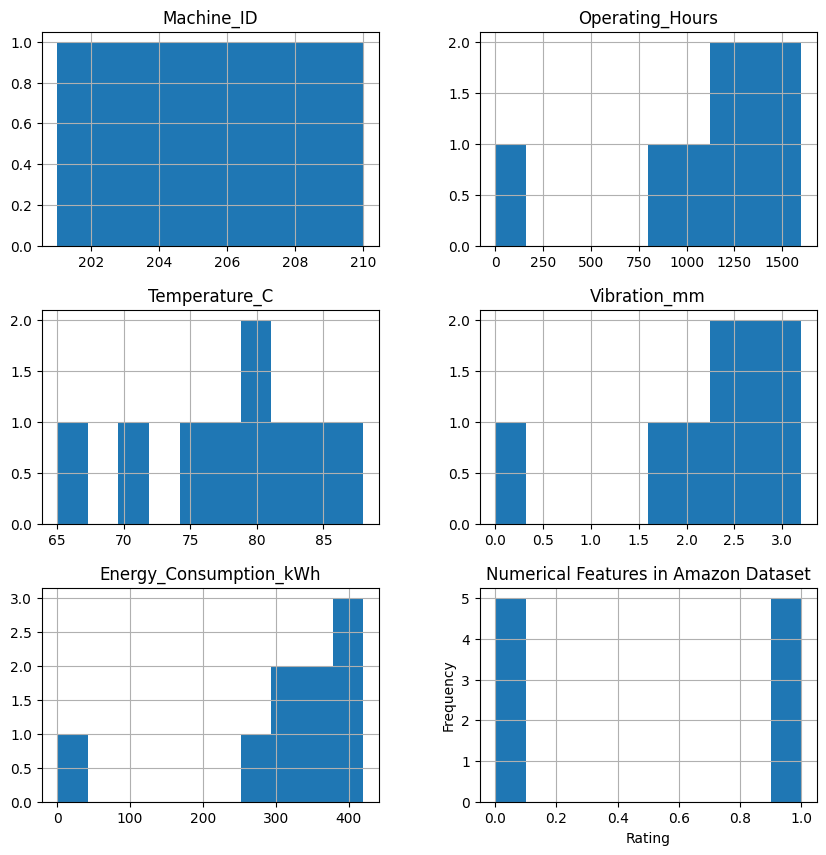

In [ ]:
numerical_features = df.select_dtypes(include='number')
numerical_features.hist(figsize=(10, 10))
plt.title('Numerical Features in Amazon Dataset')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Data Integration
* Read data from multiple sources

In [ ]:
import pandas as pd
students = pd.read_csv("students.csv")
marks = pd.read_csv("marks.csv")
students

,Student_ID,Name,Age,Gender,Department,Year,City
0,101,Apurv,21,M,CSE,3rd,Pune
1,102,Viraj,22,M,IT,4th,Mumbai
2,103,Sahil,20,M,CSE,2nd,Nagpur
3,104,Nisha,23,F,ECE,4th,Pune
4,105,Vaishnavi,21,F,IT,3rd,Nashik
5,106,Aditya,22,M,CSE,2nd,Mumbai


In [ ]:
marks

,Student_ID,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Maths,85,Sem-5,EndSem,100
1,101,DSA,88,Sem-5,EndSem,100
2,102,Maths,78,Sem-7,MidSem,100
3,103,Maths,92,Sem-3,EndSem,100
4,104,Maths,69,Sem-7,EndSem,100
5,106,Maths,67,Sem-3,MidSem,100


* Concatenate the datasets
1. Row-Wise

In [ ]:
final_data = pd.concat([students, marks], ignore_index=True)
final_data

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21.0,M,CSE,3rd,Pune,NaN,NaN,NaN,NaN,NaN
1,102,Viraj,22.0,M,IT,4th,Mumbai,NaN,NaN,NaN,NaN,NaN
2,103,Sahil,20.0,M,CSE,2nd,Nagpur,NaN,NaN,NaN,NaN,NaN
3,104,Nisha,23.0,F,ECE,4th,Pune,NaN,NaN,NaN,NaN,NaN
4,105,Vaishnavi,21.0,F,IT,3rd,Nashik,NaN,NaN,NaN,NaN,NaN
5,106,Aditya,22.0,M,CSE,2nd,Mumbai,NaN,NaN,NaN,NaN,NaN
6,101,NaN,NaN,NaN,NaN,NaN,NaN,Maths,85.0,Sem-5,EndSem,100.0
7,101,NaN,NaN,NaN,NaN,NaN,NaN,DSA,88.0,Sem-5,EndSem,100.0
8,102,NaN,NaN,NaN,NaN,NaN,NaN,Maths,78.0,Sem-7,MidSem,100.0
9,103,NaN,NaN,NaN,NaN,NaN,NaN,Maths,92.0,Sem-3,EndSem,100.0


2. Column-Wise

In [ ]:
col_data = pd.concat([students, marks], axis=1)
col_data

,Student_ID,Name,Age,Gender,Department,Year,City,Student_ID,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,101,Maths,85,Sem-5,EndSem,100
1,102,Viraj,22,M,IT,4th,Mumbai,101,DSA,88,Sem-5,EndSem,100
2,103,Sahil,20,M,CSE,2nd,Nagpur,102,Maths,78,Sem-7,MidSem,100
3,104,Nisha,23,F,ECE,4th,Pune,103,Maths,92,Sem-3,EndSem,100
4,105,Vaishnavi,21,F,IT,3rd,Nashik,104,Maths,69,Sem-7,EndSem,100
5,106,Aditya,22,M,CSE,2nd,Mumbai,106,Maths,67,Sem-3,MidSem,100


1.   Merge Datasets using Joins
* Inner Join



In [ ]:
merged_inner = pd.merge(students, marks, on='Student_ID', how='inner')
merged_inner

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,Maths,85,Sem-5,EndSem,100
1,101,Apurv,21,M,CSE,3rd,Pune,DSA,88,Sem-5,EndSem,100
2,102,Viraj,22,M,IT,4th,Mumbai,Maths,78,Sem-7,MidSem,100
3,103,Sahil,20,M,CSE,2nd,Nagpur,Maths,92,Sem-3,EndSem,100
4,104,Nisha,23,F,ECE,4th,Pune,Maths,69,Sem-7,EndSem,100
5,106,Aditya,22,M,CSE,2nd,Mumbai,Maths,67,Sem-3,MidSem,100


* Left Join

In [ ]:
merged_left = pd.merge(students, marks, on='Student_ID', how='left')
merged_left

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,Maths,85.0,Sem-5,EndSem,100.0
1,101,Apurv,21,M,CSE,3rd,Pune,DSA,88.0,Sem-5,EndSem,100.0
2,102,Viraj,22,M,IT,4th,Mumbai,Maths,78.0,Sem-7,MidSem,100.0
3,103,Sahil,20,M,CSE,2nd,Nagpur,Maths,92.0,Sem-3,EndSem,100.0
4,104,Nisha,23,F,ECE,4th,Pune,Maths,69.0,Sem-7,EndSem,100.0
5,105,Vaishnavi,21,F,IT,3rd,Nashik,NaN,NaN,NaN,NaN,NaN
6,106,Aditya,22,M,CSE,2nd,Mumbai,Maths,67.0,Sem-3,MidSem,100.0


* Right Join

In [ ]:
merged_right = pd.merge(students, marks, on='Student_ID', how='right')
merged_right

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,Maths,85,Sem-5,EndSem,100
1,101,Apurv,21,M,CSE,3rd,Pune,DSA,88,Sem-5,EndSem,100
2,102,Viraj,22,M,IT,4th,Mumbai,Maths,78,Sem-7,MidSem,100
3,103,Sahil,20,M,CSE,2nd,Nagpur,Maths,92,Sem-3,EndSem,100
4,104,Nisha,23,F,ECE,4th,Pune,Maths,69,Sem-7,EndSem,100
5,106,Aditya,22,M,CSE,2nd,Mumbai,Maths,67,Sem-3,MidSem,100


* Outer Join

In [ ]:
merged_outer = pd.merge(students, marks, on='Student_ID', how='outer')
merged_outer

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,Maths,85.0,Sem-5,EndSem,100.0
1,101,Apurv,21,M,CSE,3rd,Pune,DSA,88.0,Sem-5,EndSem,100.0
2,102,Viraj,22,M,IT,4th,Mumbai,Maths,78.0,Sem-7,MidSem,100.0
3,103,Sahil,20,M,CSE,2nd,Nagpur,Maths,92.0,Sem-3,EndSem,100.0
4,104,Nisha,23,F,ECE,4th,Pune,Maths,69.0,Sem-7,EndSem,100.0
5,105,Vaishnavi,21,F,IT,3rd,Nashik,NaN,NaN,NaN,NaN,NaN
6,106,Aditya,22,M,CSE,2nd,Mumbai,Maths,67.0,Sem-3,MidSem,100.0


* Merge using different Columns

In [ ]:
merge_columns = pd.merge(students, marks, left_on='Student_ID', right_on='Student_ID', how='inner')
merge_columns

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,Maths,85,Sem-5,EndSem,100
1,101,Apurv,21,M,CSE,3rd,Pune,DSA,88,Sem-5,EndSem,100
2,102,Viraj,22,M,IT,4th,Mumbai,Maths,78,Sem-7,MidSem,100
3,103,Sahil,20,M,CSE,2nd,Nagpur,Maths,92,Sem-3,EndSem,100
4,104,Nisha,23,F,ECE,4th,Pune,Maths,69,Sem-7,EndSem,100
5,106,Aditya,22,M,CSE,2nd,Mumbai,Maths,67,Sem-3,MidSem,100


* Joining 2 dataset using join()

In [ ]:
stud_df = students.set_index('Student_ID')
mark_df = marks.set_index('Student_ID')

integrated_stud_data = stud_df.join(mark_df)

print(integrated_stud_data)

                 Name  Age Gender Department Year    City Subject  Marks  \
Student_ID                                                                 
101             Apurv   21      M        CSE  3rd    Pune   Maths   85.0   
101             Apurv   21      M        CSE  3rd    Pune     DSA   88.0   
102             Viraj   22      M         IT  4th  Mumbai   Maths   78.0   
103             Sahil   20      M        CSE  2nd  Nagpur   Maths   92.0   
104             Nisha   23      F        ECE  4th    Pune   Maths   69.0   
105         Vaishnavi   21      F         IT  3rd  Nashik     NaN    NaN   
106            Aditya   22      M        CSE  2nd  Mumbai   Maths   67.0   

           Semester Exam_Type  Max_Marks  
Student_ID                                
101           Sem-5    EndSem      100.0  
101           Sem-5    EndSem      100.0  
102           Sem-7    MidSem      100.0  
103           Sem-3    EndSem      100.0  
104           Sem-7    EndSem      100.0  
105           

2. Concatenate Datasets (Row-wise Integration)
* Vertical concatenation

In [ ]:
combined = pd.concat([students, marks], axis=0)
combined

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21.0,M,CSE,3rd,Pune,NaN,NaN,NaN,NaN,NaN
1,102,Viraj,22.0,M,IT,4th,Mumbai,NaN,NaN,NaN,NaN,NaN
2,103,Sahil,20.0,M,CSE,2nd,Nagpur,NaN,NaN,NaN,NaN,NaN
3,104,Nisha,23.0,F,ECE,4th,Pune,NaN,NaN,NaN,NaN,NaN
4,105,Vaishnavi,21.0,F,IT,3rd,Nashik,NaN,NaN,NaN,NaN,NaN
5,106,Aditya,22.0,M,CSE,2nd,Mumbai,NaN,NaN,NaN,NaN,NaN
0,101,NaN,NaN,NaN,NaN,NaN,NaN,Maths,85.0,Sem-5,EndSem,100.0
1,101,NaN,NaN,NaN,NaN,NaN,NaN,DSA,88.0,Sem-5,EndSem,100.0
2,102,NaN,NaN,NaN,NaN,NaN,NaN,Maths,78.0,Sem-7,MidSem,100.0
3,103,NaN,NaN,NaN,NaN,NaN,NaN,Maths,92.0,Sem-3,EndSem,100.0


* Column-wise Integration

In [ ]:
students_col = students.reset_index(drop=True)
marks_col = marks.reset_index(drop=True)

column_wise = pd.concat([students_col, marks_col], axis=1)
display(column_wise)

,Student_ID,Name,Age,Gender,Department,Year,City,Student_ID,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,101,Maths,85,Sem-5,EndSem,100
1,102,Viraj,22,M,IT,4th,Mumbai,101,DSA,88,Sem-5,EndSem,100
2,103,Sahil,20,M,CSE,2nd,Nagpur,102,Maths,78,Sem-7,MidSem,100
3,104,Nisha,23,F,ECE,4th,Pune,103,Maths,92,Sem-3,EndSem,100
4,105,Vaishnavi,21,F,IT,3rd,Nashik,104,Maths,69,Sem-7,EndSem,100
5,106,Aditya,22,M,CSE,2nd,Mumbai,106,Maths,67,Sem-3,MidSem,100


* Remove redundant columns

In [ ]:
if 'Student_ID.1' in column_wise.columns:
    column_wise.drop(columns=['Student_ID.1'], inplace=True)

display(column_wise)

,Student_ID,Name,Age,Gender,Department,Year,City,Student_ID,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,101,Maths,85,Sem-5,EndSem,100
1,102,Viraj,22,M,IT,4th,Mumbai,101,DSA,88,Sem-5,EndSem,100
2,103,Sahil,20,M,CSE,2nd,Nagpur,102,Maths,78,Sem-7,MidSem,100
3,104,Nisha,23,F,ECE,4th,Pune,103,Maths,92,Sem-3,EndSem,100
4,105,Vaishnavi,21,F,IT,3rd,Nashik,104,Maths,69,Sem-7,EndSem,100
5,106,Aditya,22,M,CSE,2nd,Mumbai,106,Maths,67,Sem-3,MidSem,100


3. Handle missing values after Integration

In [ ]:
merged_left.fillna(0, inplace=True)
merged_left

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,Maths,85.0,Sem-5,EndSem,100.0
1,101,Apurv,21,M,CSE,3rd,Pune,DSA,88.0,Sem-5,EndSem,100.0
2,102,Viraj,22,M,IT,4th,Mumbai,Maths,78.0,Sem-7,MidSem,100.0
3,103,Sahil,20,M,CSE,2nd,Nagpur,Maths,92.0,Sem-3,EndSem,100.0
4,104,Nisha,23,F,ECE,4th,Pune,Maths,69.0,Sem-7,EndSem,100.0
5,105,Vaishnavi,21,F,IT,3rd,Nashik,0,0.0,0,0,0.0
6,106,Aditya,22,M,CSE,2nd,Mumbai,Maths,67.0,Sem-3,MidSem,100.0


* Storing the integrated dataset

In [ ]:
merged_left.to_csv("integrated.csv", index=False)
integrated = pd.read_csv("integrated.csv")
integrated

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,Maths,85.0,Sem-5,EndSem,100.0
1,101,Apurv,21,M,CSE,3rd,Pune,DSA,88.0,Sem-5,EndSem,100.0
2,102,Viraj,22,M,IT,4th,Mumbai,Maths,78.0,Sem-7,MidSem,100.0
3,103,Sahil,20,M,CSE,2nd,Nagpur,Maths,92.0,Sem-3,EndSem,100.0
4,104,Nisha,23,F,ECE,4th,Pune,Maths,69.0,Sem-7,EndSem,100.0
5,105,Vaishnavi,21,F,IT,3rd,Nashik,0,0.0,0,0,0.0
6,106,Aditya,22,M,CSE,2nd,Mumbai,Maths,67.0,Sem-3,MidSem,100.0


## Now We will clean the integrated dataset
1. Handling missing values
* Filling numerical values with 0

In [ ]:
for col in integrated.select_dtypes(include=['int64', 'float64']).columns:
    integrated[col] = integrated[col].fillna(0)

print(integrated)

   Student_ID       Name  Age Gender Department Year    City Subject  Marks  \
0         101      Apurv   21      M        CSE  3rd    Pune   Maths   85.0   
1         101      Apurv   21      M        CSE  3rd    Pune     DSA   88.0   
2         102      Viraj   22      M         IT  4th  Mumbai   Maths   78.0   
3         103      Sahil   20      M        CSE  2nd  Nagpur   Maths   92.0   
4         104      Nisha   23      F        ECE  4th    Pune   Maths   69.0   
5         105  Vaishnavi   21      F         IT  3rd  Nashik       0    0.0   
6         106     Aditya   22      M        CSE  2nd  Mumbai   Maths   67.0   

  Semester Exam_Type  Max_Marks  
0    Sem-5    EndSem      100.0  
1    Sem-5    EndSem      100.0  
2    Sem-7    MidSem      100.0  
3    Sem-3    EndSem      100.0  
4    Sem-7    EndSem      100.0  
5        0         0        0.0  
6    Sem-3    MidSem      100.0  


* Filling mode for categorical data

In [ ]:
for col in integrated.select_dtypes(include=['object']).columns:
    integrated[col] = integrated[col].fillna(integrated[col].mode()[0])
integrated

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,21,M,CSE,3rd,Pune,Maths,85.0,Sem-5,EndSem,100.0
1,101,Apurv,21,M,CSE,3rd,Pune,DSA,88.0,Sem-5,EndSem,100.0
2,102,Viraj,22,M,IT,4th,Mumbai,Maths,78.0,Sem-7,MidSem,100.0
3,103,Sahil,20,M,CSE,2nd,Nagpur,Maths,92.0,Sem-3,EndSem,100.0
4,104,Nisha,23,F,ECE,4th,Pune,Maths,69.0,Sem-7,EndSem,100.0
5,105,Vaishnavi,21,F,IT,3rd,Nashik,0,0.0,0,0,0.0
6,106,Aditya,22,M,CSE,2nd,Mumbai,Maths,67.0,Sem-3,MidSem,100.0


### Data Transformation
1. Normalization
* Function to normalize using min max.

In [ ]:
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

In [ ]:
integrated['Age'] = normalize(integrated['Age'])
integrated['Marks'] = normalize(integrated['Marks'])
integrated['Max_Marks'] = normalize(integrated['Max_Marks'])
integrated

,Student_ID,Name,Age,Gender,Department,Year,City,Subject,Marks,Semester,Exam_Type,Max_Marks
0,101,Apurv,0.333333,M,CSE,3rd,Pune,Maths,0.923913,Sem-5,EndSem,1.0
1,101,Apurv,0.333333,M,CSE,3rd,Pune,DSA,0.956522,Sem-5,EndSem,1.0
2,102,Viraj,0.666667,M,IT,4th,Mumbai,Maths,0.847826,Sem-7,MidSem,1.0
3,103,Sahil,0.000000,M,CSE,2nd,Nagpur,Maths,1.000000,Sem-3,EndSem,1.0
4,104,Nisha,1.000000,F,ECE,4th,Pune,Maths,0.750000,Sem-7,EndSem,1.0
5,105,Vaishnavi,0.333333,F,IT,3rd,Nashik,0,0.000000,0,0,0.0
6,106,Aditya,0.666667,M,CSE,2nd,Mumbai,Maths,0.728261,Sem-3,MidSem,1.0


2. Label Encoding

In [ ]:
a = pd.read_csv("integrated.csv")
a
gender_map = {'M': 1, 'F': 0}
a['Gender'] = a['Gender'].map(gender_map)
print(a)

   Student_ID       Name  Age  Gender Department Year    City Subject  Marks  \
0         101      Apurv   21       1        CSE  3rd    Pune   Maths   85.0   
1         101      Apurv   21       1        CSE  3rd    Pune     DSA   88.0   
2         102      Viraj   22       1         IT  4th  Mumbai   Maths   78.0   
3         103      Sahil   20       1        CSE  2nd  Nagpur   Maths   92.0   
4         104      Nisha   23       0        ECE  4th    Pune   Maths   69.0   
5         105  Vaishnavi   21       0         IT  3rd  Nashik       0    0.0   
6         106     Aditya   22       1        CSE  2nd  Mumbai   Maths   67.0   

  Semester Exam_Type  Max_Marks  
0    Sem-5    EndSem      100.0  
1    Sem-5    EndSem      100.0  
2    Sem-7    MidSem      100.0  
3    Sem-3    EndSem      100.0  
4    Sem-7    EndSem      100.0  
5        0         0        0.0  
6    Sem-3    MidSem      100.0  


3. One-Hot Encoding

In [ ]:
final = pd.get_dummies(
    a,
    columns=['Department', 'City', 'Subject', 'Semester', 'Year'],
    drop_first=True
)

display(final)

,Student_ID,Name,Age,Gender,Marks,Exam_Type,Max_Marks,Department_ECE,Department_IT,City_Nagpur,City_Nashik,City_Pune,Subject_DSA,Subject_Maths,Semester_Sem-3,Semester_Sem-5,Semester_Sem-7,Year_3rd,Year_4th
0,101,Apurv,21,1,85.0,EndSem,100.0,False,False,False,False,True,False,True,False,True,False,True,False
1,101,Apurv,21,1,88.0,EndSem,100.0,False,False,False,False,True,True,False,False,True,False,True,False
2,102,Viraj,22,1,78.0,MidSem,100.0,False,True,False,False,False,False,True,False,False,True,False,True
3,103,Sahil,20,1,92.0,EndSem,100.0,False,False,True,False,False,False,True,True,False,False,False,False
4,104,Nisha,23,0,69.0,EndSem,100.0,True,False,False,False,True,False,True,False,False,True,False,True
5,105,Vaishnavi,21,0,0.0,0,0.0,False,True,False,True,False,False,False,False,False,False,True,False
6,106,Aditya,22,1,67.0,MidSem,100.0,False,False,False,False,False,False,True,True,False,False,False,False


4. Save Final Cleaned Dataset

In [ ]:
final.to_csv('cleaned-dataset.csv', index=False)
print("Final cleaned dataset saved successfully!")

Final cleaned dataset saved successfully!


### Conclusion
In this file, we have implemented some operations on datasets using python with that we have successfully performed data cleaning, data integration and created an histogram for visual analysis.